## Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
# Read the CSV file into Python
housing = pd.read_csv('data.csv')

In [3]:
# Prints the first 5 rows of housing data with column names
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Prints info about selected dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# Selects the 'CHAS' column data from housing dataframe
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
# Prints the different values and their counts in the CHAS column
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
# Prints the statistical info about selected dataframe like - count, mean, min, max, etc..
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
# Draws a histogram of 'AGE' data in housing dataframe. 
import numpy as np
# Rule of Thumb, Square Root Method to find out the bins value for given data
# bins_value = int(np.sqrt(len(housing['AGE'])))

# housing['AGE'].hist(bins=bins_value, figsize=(20,15))

In [10]:
# housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [11]:
# # Splits the training and testing data
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data)) # Takes a list of numbers from 0 to 506 and shuffles them 
    test_set_size = int(len(data) * test_ratio) # Takes a ratio (e.g. 0.20) and finds that percentage of 506 (e.g 112)
    test_indices = shuffled[:test_set_size] # A list of indices (multiple indexes) from 0 to test_set_size (e.g. 112) for test dataset
    train_indices = shuffled[test_set_size:] # A list of indices (multiple indexes) from test_set_size (e.g. 112) to 506 for training dataset
    return data.iloc[train_indices], data.iloc[test_indices] # Selects a list of items from given indices for training and testing data

In [12]:
# train_set, test_set = split_train_test(housing, 0.2)

In [13]:
# # We always try to keep more data in our training set and less data in our testing set
# print(f"Rows in Train Set: {len(train_set)}")
# print(f"Rows in Test Set: {len(test_set)}")

In [14]:
housing.shape

(506, 14)

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split_data = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_data.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
# strat_test_data.describe()
# strat_train_data.describe()

In [18]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [19]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
# housing = strat_train_data.copy()
# housing.shape

## Looking for Correlation

In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<Axes: >

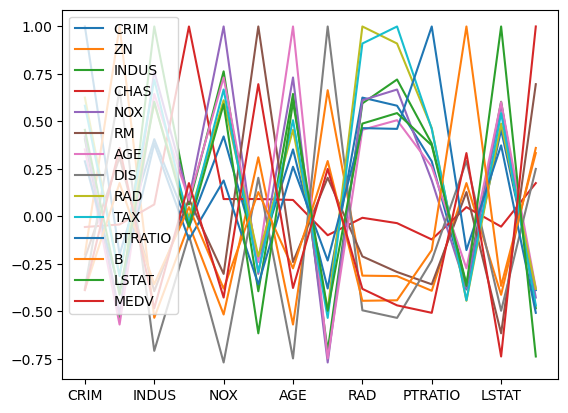

In [22]:
corr_matrix.plot()

In [23]:
# from pandas.plotting import scatter_matrix

In [24]:
# attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
# scatter_matrix(housing[attributes], figsize = (12,8))
# When attributes are compared against themselves, we get a histogram of their data

<Axes: xlabel='RM', ylabel='MEDV'>

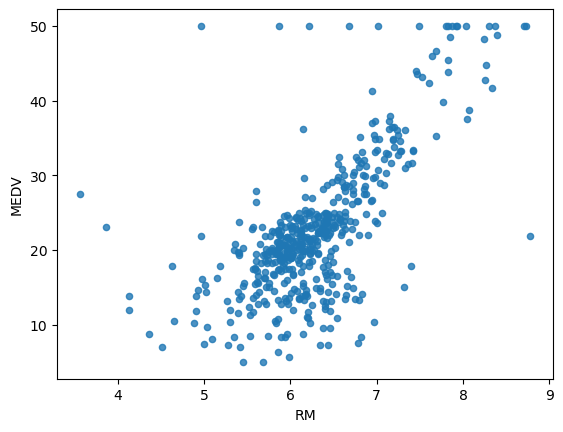

In [25]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)
# It draws the correlation between MEDV(value) and RM(no. of rooms)
# We can see that the data plotted has some descrepencies.

In [26]:
# Houses with 9 rooms are available at 50 and those with 5 rooms are also available at 50
# This is clearly not possible, pointing towards some form of data capping by the data collection team.

## Attribute Combinations

In [27]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [28]:
# housing['TAXRM'].plot()

In [29]:
# housing['TAXRM'].describe()

In [30]:
# housing['TAX'].describe()

In [31]:
# housing['RM'].describe()

In [32]:
# To handle missing values in RM attribute, we have 3 options:
    # 1. Get rid of missing data entries
    # 2. Get rid of the attribute entirely
    # 3. Set some value for the missing data

In [33]:
# 1. We already have a small dataset, we can't remove data points
# 2. RM is an essential attribute so we can't remove it
# 3. We CAN set some value for missing data

In [34]:
# Approach 1:
# new_set1 = housing.dropna(subset=['RM'])
# new_set1.shape

In [35]:
# Approach 2:
# new_set2 = housing.drop('RM', axis=1)
# new_set2.shape

In [36]:
# Approach 3:
# median = housing['RM'].median()
# new_set3 = housing['RM'].fillna(median)
# new_set3.shape

In [37]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,41.407553
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,44.607843
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,39.134174
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,40.182514


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20800000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.36078965e+01])

In [40]:
X = imputer.transform(housing)

In [41]:
housing_newDF = pd.DataFrame(X, columns = housing.columns)

In [42]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.906572
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.450491
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.497173
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.607897
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,98.201121
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [43]:
housing_newDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.775162
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.322097
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.838179
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.607897
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,97.919933
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [44]:
# As we can see the missing data has been filled in the RM field.

## SciKit-Learn Design


In [45]:
# 3 Types of objects:

# 1. Estimators - It estimates some parameters based on a dataset (e.g. Imputer)
    # Fit Method: Fits the dataset and calculates internal parameters
    # Transform Method: Takes input and returns output based on the learnings from fit()
    # Fit_Transform: It also has a convenience function which fits then transforms.
# 2. Transformers - 
# 3. Predictors - LinearRegression model is an example of predictor.
    # Fit: Fots into the dataset
    # Predict: Gives score function whichc will evaluate the prediction.

## Feature Scaling

In [46]:
# 2 Types:
# These are basically normalization techniques)

#     1. Standardization: (StandardScaler method)
            # z = (x - μ) / σ
            # Where:
            #     x is the original value of the feature.
            #     μ is the mean of the feature's values.
            #     σ is the standard deviation of the feature's values.

#     2. Min-Max Scaling(Normalization): (MinMaxScaler method)
            # x_scaled = (x - min) / (max - min)
            # Where:
            #     x is the original value of the feature.
            #     μ is the mean of the feature's values.
            #     σ is the standard deviation of the feature's values.

## Creating a Pipeline

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

myPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # Add as many as you want in the pipeline
    ('std_scalar', StandardScaler()),
])

In [48]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,41.407553
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,44.607843
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,39.134174
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,40.182514


In [49]:
housing_num_tr = myPipeline.fit_transform(housing)

In [50]:
housing_num_tr.shape

(506, 15)

In [51]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

ValueError: Found input variables with inconsistent numbers of samples: [506, 404]

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data.shape

In [ ]:
some_labels.shape

In [ ]:
prepared_data = myPipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

In [ ]:
list(some_labels)

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

mse